In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df = df.dropna()

In [6]:
df.shape

(45211, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
x = df.iloc[:, 0:15]
y = df.iloc[:,[-1]]


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

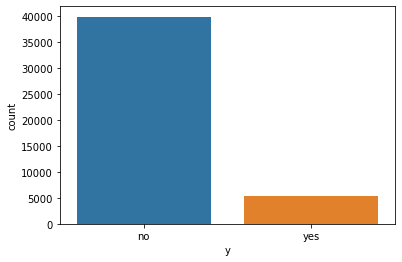

In [9]:
sns.countplot(df["y"])

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x1 = x.apply(le.fit_transform)
y1 = y.apply(le.fit_transform)
x1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0


In [11]:
y1.head()

,y
0,0
1,0
2,0
3,0
4,0


In [12]:
classifier = LogisticRegression()
classifier.fit(x1,y1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
filename = 'final_model2.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [14]:
pickle.load(open(filename, 'rb'))

y_pred = classifier.predict(x1)

In [22]:
y_pred = classifier.predict(x1)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1,y_pred)
confusion_matrix

array([[38946,   976],
       [ 4245,  1044]])

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y1,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.52      0.20      0.29      5289

    accuracy                           0.88     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.88      0.86     45211



In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds= roc_curve(y1, classifier.predict_proba(x1)[:,1])

auc = roc_auc_score(y1, y_pred)


Text(0, 0.5, 'True Positive Rate')

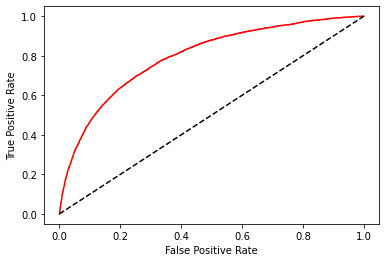

In [27]:
plt.plot(fpr, tpr, color = "red", label = "logit model"%auc)
plt.plot([0,1], [0,1], "k--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
